 
<a name="Top"></a>
# Hands-On Machine Learning - Table of Content
1. [Importing Cleaned Dataset](#_1)

2. [Extracting Features, X and Target Variable, y](#_2)

3. [Train-Test-Split](#_3)

4. [Model Fitting and Prediction](#_4)

5. [Model Evaluation](#_5)



In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a name="_1"></a>
# Importing Cleaned Dataset

Recall that we’ve performed basic **Exploratory Data Analysis(EDA)** and **Data Cleaning** towards our raw dataset, today’s task will continue to work towards the **building and evaluation of machine learning models** with [scikit-learn](https://scikit-learn.org/stable/modules/classes.html) library in python.

Cleaned Data Dictionary

| Variable | Definition | Key | Datatype |
| --- |---|---| --- |
| pclass | Ticket Class | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical Ordinal |
| survived | Survival | 0 = No, 1 = Yes | Categorical Nominal |
| age | Age in years |  | Numerical |
| sibsp | # of siblings / spouses aboard the Titanic | | Numerical| 
| parch | # of parents / children aboard the Titanic | | Numerical |
| fare | Passenger fare | | Numerical |
| sex_male |  Gender | 0 = female, 1 = male | Categorical Nominal |
| embarked_Q | Port of Embarkation from Queenstown | | Categorical Nominal |
| embarked_S | Port of Embarkation from Southampton | | Categorical Nominal |

[Back to the Content Table](#Top)


In [ ]:
# Import Cleaned Dataset from Github
# https://raw.githubusercontent.com/Tien-Cheng/ML-Bootcamp/main/Datasets/Titanic/titanic_cleaned.csv
titanic_cleaned = pd.read_csv("https://raw.githubusercontent.com/Tien-Cheng/ML-Bootcamp/main/Datasets/Titanic/titanic_cleaned.csv", index_col=0)
titanic_cleaned.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
5,1.0,1.0,1.433827,-0.479087,-0.445,-0.130140,1,0,1
7,1.0,0.0,0.736169,-0.479087,-0.445,-0.643464,1,0,1
8,1.0,1.0,1.821414,1.441662,-0.445,0.351847,0,0,1
15,1.0,0.0,-0.116523,-0.479087,-0.445,-0.142224,1,0,1
22,1.0,1.0,-0.271558,-0.479087,-0.445,-0.063437,1,0,0


In [ ]:
# Display basic Information of Dataframe
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 5 to 1308
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      858 non-null    float64
 1   survived    858 non-null    float64
 2   age         858 non-null    float64
 3   sibsp       858 non-null    float64
 4   parch       858 non-null    float64
 5   fare        858 non-null    float64
 6   sex_male    858 non-null    int64  
 7   embarked_Q  858 non-null    int64  
 8   embarked_S  858 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 67.0 KB


<a name="_2"></a>
# Extracting Features, `X` and Target Variable, `y`

In Supervised Learning, our task is to predict target variable, `y` based on the features, `X`.

Before parsing out dataset into our model, we need to first extract **features** and **target variable** from our cleaned dataset.

[Back to the Content Table](#Top)


In [ ]:
# Extract X and y using Pandas Column Slicing
X = titanic_cleaned.drop(columns="survived")
y = titanic_cleaned["survived"]

In [ ]:
X

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
5,1.0,1.433827,-0.479087,-0.445,-0.130140,1,0,1
7,1.0,0.736169,-0.479087,-0.445,-0.643464,1,0,1
8,1.0,1.821414,1.441662,-0.445,0.351847,0,0,1
15,1.0,-0.116523,-0.479087,-0.445,-0.142224,1,0,1
22,1.0,-0.271558,-0.479087,-0.445,-0.063437,1,0,0
...,...,...,...,...,...,...,...,...
1304,3.0,-1.163009,0.481288,-0.445,-0.364003,0,0,0
1305,3.0,-0.116523,0.481288,-0.445,-0.364003,0,0,0
1306,3.0,-0.232799,-0.479087,-0.445,-0.503774,1,0,0
1307,3.0,-0.194040,-0.479087,-0.445,-0.503774,1,0,0


In [ ]:
y

5       1.0
7       0.0
8       1.0
15      0.0
22      1.0
       ... 
1304    0.0
1305    0.0
1306    0.0
1307    0.0
1308    0.0
Name: survived, Length: 858, dtype: float64

<a name="_3"></a>

# Train-Test-Split
Motive
- Train your model with a training set and test the performance of the trained model with testing set which comprises data that hasn’t been seen by the model.
- To evaluate how well your model generalizes to data that hasn't been seen by the model.
- Common Ratio of splitting data for train set and test set is 7:3 or 8:2
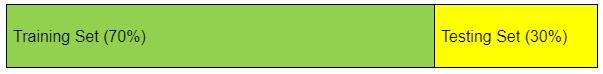

[Back to the Content Table](#Top)

In [ ]:
# Import train_test_split function from sklearn library
from sklearn.model_selection import train_test_split

'''
train_test_split
Split the data into train set and test set. Test set 
allow evaluation of model with data points that hasn't been seen by model.

Parameters (Inputs)
----------
X : array_like
    Set of Features to predict the target label
y : array_like
    Target label to be predicted by the model
test_size : float or int, Default 0.25 (7:3 Split)
    Proportion of the dataset to include in the test split. Should be Between 0.0 and 1.0. 
random_state: int
    Arbitraty Number to control shuffling applied to the data before applying the split to ensure reproduciblity.

Returns (Outputs)
----------
X_train : array_like
    Set of features for training
X_test : array_like
		Set of features for testing
y_train : array_like
		Target label for training
y_test : array_like
		Target label for testing
'''

# Perform train_test_split to X and y with test_size = 0.3 and random_state = 32
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [ ]:
X_train

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
1088,3.0,0.193547,-0.479087,-0.445,-0.493141,1,0,1
58,1.0,1.511344,-0.479087,-0.445,-0.140774,1,0,1
333,2.0,0.503617,-0.479087,-0.445,-0.392119,0,0,1
1280,3.0,-0.581628,-0.479087,-0.445,-0.490805,1,0,1
1249,3.0,-0.116523,-0.479087,-0.445,-0.493624,1,1,0
...,...,...,...,...,...,...,...,...
723,3.0,0.116029,-0.479087,-0.445,-0.493947,1,1,0
219,1.0,-0.116523,-0.479087,-0.445,-0.145768,1,0,0
596,2.0,0.116029,-0.479087,-0.445,-0.392119,1,0,1
920,3.0,-0.116523,-0.479087,-0.445,-0.493624,1,1,0


In [ ]:
X_test

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
354,2.0,-0.349075,0.481288,-0.445,-0.140774,1,0,1
993,3.0,-0.116523,-0.479087,-0.445,-0.493866,0,1,0
616,3.0,-0.426593,-0.479087,-0.445,-0.507158,1,0,1
1242,3.0,-0.116523,-0.479087,-0.445,-0.519000,1,0,0
1185,3.0,-0.116523,1.441662,-0.445,-0.224314,1,0,0
...,...,...,...,...,...,...,...,...
995,3.0,0.426099,-0.479087,-0.445,-0.490805,1,0,0
634,3.0,-0.271558,-0.479087,-0.445,-0.490805,1,0,1
674,3.0,0.193547,-0.479087,-0.445,0.448839,1,0,1
1275,3.0,-1.046733,1.441662,-0.445,-0.295448,1,0,1


In [ ]:
y_train

1088    1.0
58      0.0
333     1.0
1280    0.0
1249    0.0
       ... 
723     0.0
219     1.0
596     1.0
920     0.0
1132    0.0
Name: survived, Length: 600, dtype: float64

<a name="_4"></a>

# Model Fitting and Prediction
5 Steps of Model Fitting and Prediction with Scikit-Learn Library:
1. Import model class from Sklearn library
2. Initiate the class with hyperparameters and store the instance at a variable
3. Call `.fit()` method to train the model by parsing `X_train` and `y_train`
4. Call `.predict()` method with the trained model to predict features, `X_test`
5. Evaluate the performance of model by comparing the prediction with ground truth, `y_test`

[Back to the Content Table](#Top)


Logistic Regression

[Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression # import LogisticRegression class from sklearn.linear_model
from sklearn.metrics import accuracy_score # import accuracy_score function from sklearn.metrics

logrex = LogisticRegression() # Initiate the class and store the instance at variable logrex

logrex.fit(X_train, y_train) # Fit the model with X_train and y_train

prediction = logrex.predict(X_test) # Generate prediction based on features in X_test

score = accuracy_score(y_test, prediction) # Compare prediction with y_test(ground truth)

print(f"Accuracy Score for {LogisticRegression.__name__} : {score}") # Print out the score

Accuracy Score for LogisticRegression : 0.8178294573643411


Random Forest Classifier

[Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
from sklearn.ensemble import RandomForestClassifier # import DecisionTreeClassifier class from sklearn.ensemble library

rf = RandomForestClassifier(random_state=42) # Initiate the class and store the instance at variable rf

rf.fit(X_train, y_train) # Fit the model with X_train and y_train

prediction = rf.predict(X_test) # Generate prediction based on features in X_test

score = accuracy_score(y_test, prediction) # Compare prediction with y_test(ground truth)

print(f"Accuracy Score for {RandomForestClassifier.__name__} : {score}") # Print out the score

Accuracy Score for RandomForestClassifier : 0.7635658914728682


**Choosing the right model**

In solving a machine learning problem, choosing the right model could have great impact towards the scoring of a model.

However, the problem of model selection often depends on the nature of the problem, how well can the data fit to the model and fine tuning of hyperparameters for each model.

Scikit-Learn Library have provided implementation for various *classification, regression* and *clustering* algorithms. Read the [documentation](https://scikit-learn.org/stable/supervised_learning.html) as well as the roadmap below to get inspiration to select which model is the right model for you.
![ml_map.png](https://scikit-learn.org/stable/_static/ml_map.png)



<a name="_5"></a>

# Model Evaluation
From previous cell of model selection, we've decided to make use of `LogisticRegression` as our model for the problem as it has a **higher test Score** than `RandomForestClassifier`.

If the model is able to do as well in `testing set`, then it can be deployed to solve real world problem.

[Back to the Content Table](#Top)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score # Import f1_score, confusion_matrix

logrex = LogisticRegression()

logrex.fit(X_train, y_train)

prediction = logrex.predict(X_test)

print(f"Test Accuracy Score\t:{accuracy_score(y_test, prediction)}") # Test Accuracy Score
print(f"Test F1 Score\t:{f1_score(y_test, prediction)}") # Test F1 Score

Test Accuracy Score	:0.8178294573643411
Test F1 Score	:0.6412213740458016


In [ ]:
from sklearn.metrics import classification_report # Import Classification Report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       189
         1.0       0.68      0.61      0.64        69

    accuracy                           0.82       258
   macro avg       0.77      0.75      0.76       258
weighted avg       0.81      0.82      0.81       258



[[169  20]
 [ 27  42]]
Test Confusion Matrix:



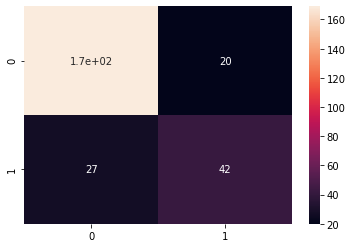

In [ ]:
from sklearn.metrics import confusion_matrix # Import Confusion Matrix
matrix = confusion_matrix(y_test, prediction)
print(matrix)
print(f"Test Confusion Matrix:\n")
sns.heatmap(matrix, annot = True) # Plot Confusion Matrix
plt.show()

Scikit-Learn have implementation of other evaluation metrics other than classification metrics that you have learned so far like `Accuracy` such as `F1 Score`, `Precision`, `Recall`, `Confusion Matrix`, etc.

For regression problem, Scikit-Learn have its own suite of tools as well as such as `Mean Squared Error(MSE)`, `R2 Score`, `Mean Absolute Error(MAE)`, etc.

Refer to [documentation](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics) for complete list of evaluation metrics available and its implementation.